In [1]:
# 9.6.2_mutliple_linear_regression_matrix_form.ipynb
""" 9.6.2 Multiple Linear Regression Example """
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# The data
X = np.array([[ 1,  7,  560 ],
              [ 1,  3,  220 ],
              [ 1,  3,  340 ],
              [ 1,  4,   80 ],
              [ 1,  6,  150 ],
              [ 1,  7,  330 ],
              [ 1,  2,  110 ],
              [ 1,  7,  210 ],
              [ 1, 30, 1460 ],
              [ 1,  5,  605 ],
              [ 1, 16,  688 ],
              [ 1, 10,  215 ],
              [ 1,  4,  255 ],
              [ 1,  6,  462 ],  
              [ 1,  9,  448 ],
              [ 1, 10,  776 ],
              [ 1,  6,  200 ],
              [ 1,  7,  132 ],
              [ 1,  3,   36 ],
              [ 1, 17,  770 ],
              [ 1, 10,  140 ],
              [ 1, 26,  810 ],
              [ 1,  9,  450 ],
              [ 1,  8,  635 ],
              [ 1,  4,  150 ]])
   
y = np.array([16.68, 11.50, 12.03, 14.88, 13.75,
              18.11,  8.00, 17.83, 79.24, 21.50,
              40.33, 21.00, 13.50, 19.75, 24.00,   
              29.00, 15.35, 19.00,  9.50, 35.10,
              17.90, 52.32, 18.75, 19.83, 10.75])

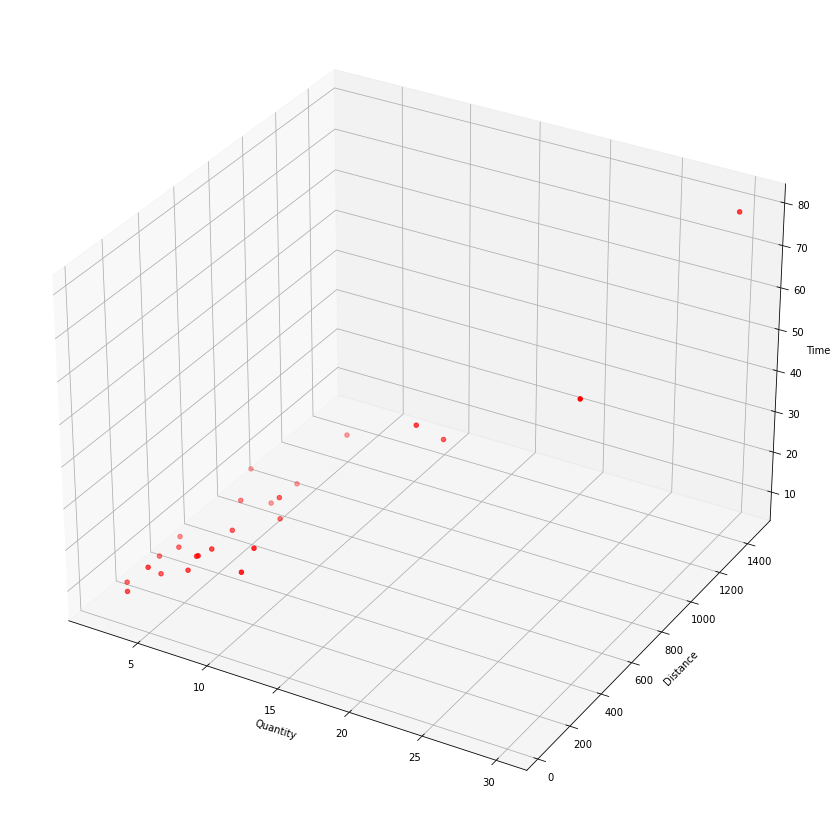

In [3]:
# Plot the data
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y, color='red', marker='o')
ax.set_xlabel('Quantity')
ax.set_ylabel('Distance')
ax.set_zlabel('Time')
plt.show()

In [4]:
# Number of observations and parameters
n, p = np.shape(X)

In [5]:
# Compute X'X matrix
XtX = np.dot(X.T, X)
print("X'X Matrix = ")
print(XtX)

X'X Matrix = 
[[     25     219   10232]
 [    219    3055  133899]
 [  10232  133899 6725688]]


In [6]:
# Compute X'y vector
Xty = np.dot(X.T, y)
print(f"X'y vector = {Xty}")

X'y vector = [   559.6    7375.44 337071.69]


In [7]:
# Compute beta = (X'X)^{-1} X'y
beta = np.dot(np.linalg.inv(XtX),Xty)
print(f"Fitted coefficients: {beta}")

Fitted coefficients: [2.34123115 1.61590721 0.01438483]


In [8]:
# Compute predicted y values
yhat = np.dot(X, beta)
# Compute residues
e = (y - yhat)
SSRes = np.dot(e.T, e)
# Compute Standard Error
SE = np.sqrt(SSRes/(n-p))
print(f"Standard Error = {SE}")

Standard Error = 3.259473447580096


In [9]:
# Compute R^2 = 1 - SSRes / SST
SST = np.dot(y.T,y) - n*np.mean(y)**2
R_squared = 1 - SSRes/SST
print(f"R-squared = {R_squared}")

R-squared = 0.9595937494832257


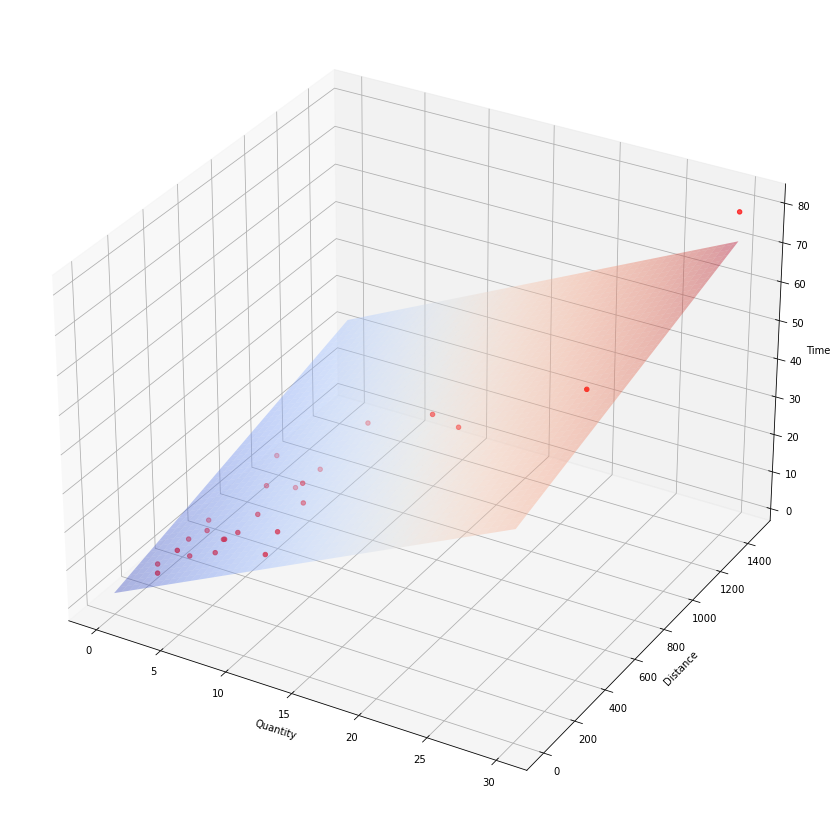

In [10]:
# Plot the fitted model with the data
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
# Make mesh data
x1 = np.linspace(0, np.max(X,axis=0)[1],100)
x2 = np.linspace(0, np.max(X,axis=0)[2],100)
x1_surf, x2_surf = np.meshgrid(x1, x2)

# fit = lambda x1,x2 : beta[0] + beta[1]*x1 + beta[2]*x2
fit = lambda x1,x2: np.dot(beta, np.array([1,x1,x2], dtype=object))
ax.scatter(X[:,1], X[:,2], y, color='red', marker='o')
ax.plot_surface(x1_surf,x2_surf,fit(x1_surf, x2_surf), alpha=0.4,
                cmap=cm.coolwarm)
ax.set_xlabel('Quantity')
ax.set_ylabel('Distance')
ax.set_zlabel('Time')
plt.show()

In [11]:
# Predict the time required for x1 = 20, x2=300
x1 = 20
x2 = 300
print(f"Predicted time for x1 = {x1} and x2 = {x2} is ",
      f"{np.dot(np.array([1,x1,x2]), beta)}")

Predicted time for x1 = 20 and x2 = 300 is  38.974823234041764
